In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dir = "/home/feulo/pd-externals/mindflex/teste_attention/"

subdirs = [x[0] for x in os.walk(dir)]
err_1= np.zeros(len(subdirs)-1)
err_2= np.zeros(len(subdirs)-1)
err_3= np.zeros(len(subdirs)-1)
tot_err= np.zeros(len(subdirs)-1)
err_conc= np.zeros([len(subdirs)-1,3])
err_desc= np.zeros([len(subdirs)-1,3])
time_1 = np.zeros(len(subdirs)-1)
time_2 = np.zeros(len(subdirs)-1)
time_3 = np.zeros(len(subdirs)-1)
trh = np.zeros(len(subdirs)-1)
ptc = []
i=-1
for subdir in subdirs:
    if(os.path.isfile(subdir+"/times.txt")):
        t = np.loadtxt(subdir+"/times.txt")
        time_1[i] = t[0]
        time_2[i] = t[1]
        time_3[i] = t[2]
    if(os.path.isfile(subdir+"/threshold.txt")):
        trh[i]= np.loadtxt(subdir+"/threshold.txt")
    if(os.path.isfile(subdir+"/test_0_err.txt")):
        t= np.loadtxt(subdir+"/test_0_err.txt")
        err_1[i] = t.sum()
        tot_err[i] = t.sum()
        hdk = t[[0,2,3,4,6,7]]
        qck = t[[1,5]]
        err_conc[i][0]= hdk.sum()
        err_desc[i][0]= qck.sum()
        
    if(os.path.isfile(subdir+"/test_1_err.txt")):
        t= np.loadtxt(subdir+"/test_1_err.txt")
        err_2[i] = t.sum()
        tot_err[i] += t.sum()
        hdk = t[[0,3,4,6]]
        qck = t[[1,2,5,7]]
        err_conc[i][1]= hdk.sum()
        err_desc[i][1]= qck.sum()
        
    if(os.path.isfile(subdir+"/test_2_err.txt")):
        t= np.loadtxt(subdir+"/test_2_err.txt")
        err_3[i] = t.sum()
        tot_err[i] += t.sum()
        hdk = t[[0,4,6,7]]
        qck = t[[1,2,3,5]]
        err_conc[i][2]= hdk.sum()
        err_desc[i][2]= qck.sum()
        ptc.append(subdir)
    i+=1

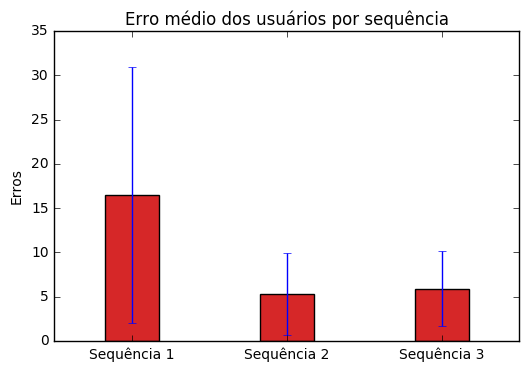

In [13]:
ind = np.arange(3)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, [np.mean(err_1),np.mean(err_2),np.mean(err_3)], width, color='#d62728', yerr=[np.std(err_1),np.std(err_2),np.std(err_3)],align="center")
plt.ylabel('Erros')
plt.title('Erro médio dos usuários por sequência')
plt.xticks(ind, ('Sequência 1', 'Sequência 2', 'Sequência 3'))
plt.savefig('mean_err.png')
plt.show()

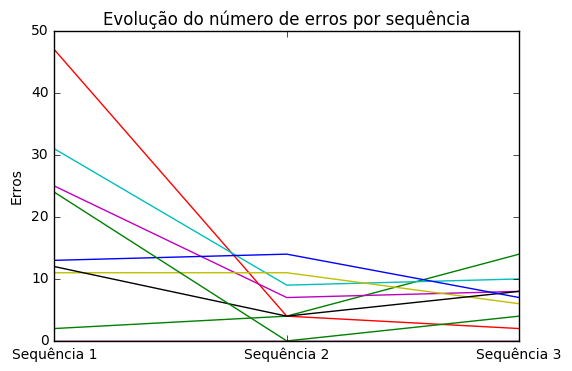

In [15]:
ind = np.arange(3)    # the x locations for the groups

for j in range(i):
    plt.plot(ind, [err_1[j],err_2[j],err_3[j]],label='voluntário %d' % (j+1))

plt.ylabel('Erros')
plt.title('Evolução do número de erros por sequência')
plt.xticks(ind, ('Sequência 1', 'Sequência 2', 'Sequência 3'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.legend(bbox_to_anchor=(0.5,-0.1), loc=9, borderaxespad=0.,ncol=4)
plt.savefig('env_err.png', bbox_inches='tight')
plt.show()

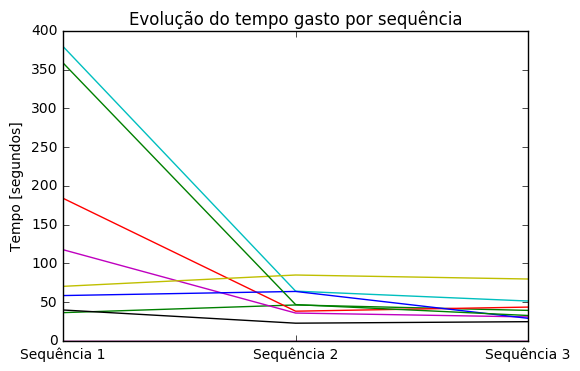

In [16]:
ind = np.arange(3)    # the x locations for the groups

for j in range(i):
    plt.plot(ind, [time_1[j],time_2[j],time_3[j]],label='voluntário %d' % (j+1))

plt.ylabel('Tempo [segundos]')
plt.title('Evolução do tempo gasto por sequência')
plt.xticks(ind, ('Sequência 1', 'Sequência 2', 'Sequência 3'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('env_type.png', bbox_inches='tight')
plt.show()

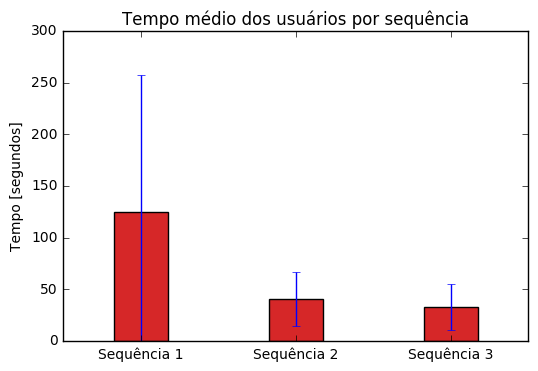

In [6]:
ind = np.arange(3)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, [np.mean(time_1),np.mean(time_2),np.mean(time_3)], width, color='#d62728', yerr=[np.std(time_1),np.std(time_2),np.std(time_3)],align="center")
plt.ylabel('Tempo [segundos]')
plt.title('Tempo médio dos usuários por sequência')
plt.xticks(ind, ('Sequência 1', 'Sequência 2', 'Sequência 3'))
plt.axis([-0.5,2.5,0,300])
plt.savefig('mean_time.png')
plt.show()

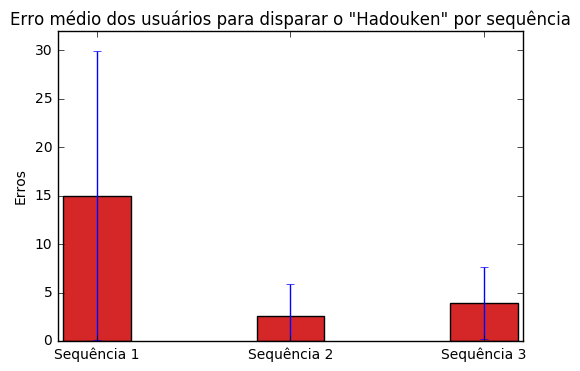

In [7]:
ind = np.arange(3)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, [np.mean(err_conc[:,0]),np.mean(err_conc[:,1]),np.mean(err_conc[:,2])], width, color='#d62728', yerr=[np.std(err_conc[:,0]),np.std(err_conc[:,1]),np.std(err_conc[:,2])],align="center")
plt.ylabel('Erros')
plt.title('Erro médio dos usuários para disparar o "Hadouken" por sequência')
plt.xticks(ind, ('Sequência 1', 'Sequência 2', 'Sequência 3'))
plt.axis([-0.2,2.2,0,32]) 
plt.savefig('mean_err_conc')
plt.show()

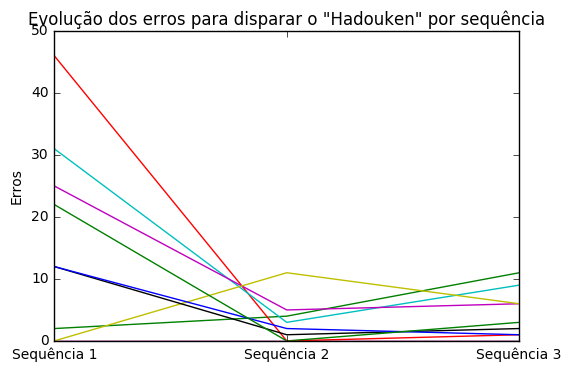

In [17]:
ind = np.arange(3)    # the x locations for the groups

for j in range(i):
    plt.plot(ind, err_conc[j,:],label='voluntário %d' % (j+1))

plt.ylabel('Erros')
plt.title('Evolução dos erros para disparar o "Hadouken" por sequência')
plt.xticks(ind, ('Sequência 1', 'Sequência 2', 'Sequência 3'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('ev_err_conc.png', bbox_inches='tight')
plt.show()

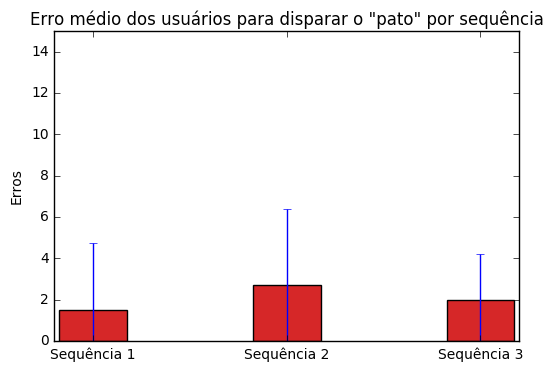

In [9]:
ind = np.arange(3)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, [np.mean(err_desc[:,0]),np.mean(err_desc[:,1]),np.mean(err_desc[:,2])], width, color='#d62728', yerr=[np.std(err_desc[:,0]),np.std(err_desc[:,1]),np.std(err_desc[:,2])],align="center")
plt.ylabel('Erros')
plt.title('Erro médio dos usuários para disparar o "pato" por sequência')
plt.xticks(ind, ('Sequência 1', 'Sequência 2', 'Sequência 3'))
plt.axis([-0.2,2.2,0,15])
plt.savefig('mean_err_desc.png')
plt.show()

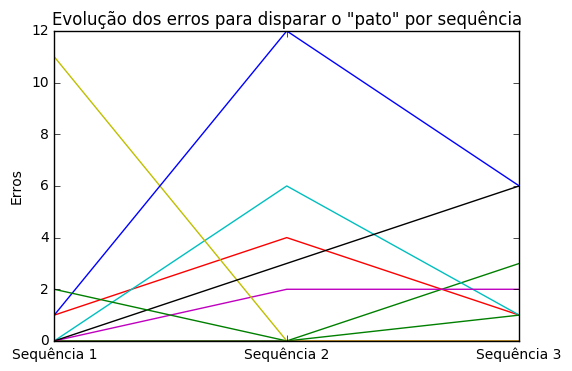

In [18]:
ind = np.arange(3)    # the x locations for the groups
for j in range(i):
    plt.plot(ind, err_desc[j,:],label='voluntário %d' % (j+1))
plt.ylabel('Erros')
plt.title('Evolução dos erros para disparar o "pato" por sequência')
plt.xticks(ind, ('Sequência 1', 'Sequência 2', 'Sequência 3'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('ev_err_desc.png', bbox_inches='tight')
plt.show()

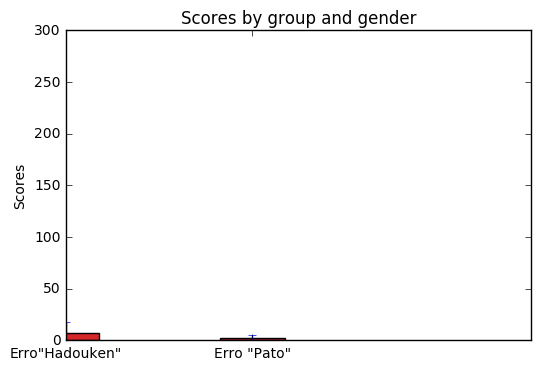

In [11]:
ind = np.arange(2)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, [np.mean(err_conc),np.mean(err_desc)], width, color='#d62728', yerr=[np.std(err_conc),np.std(err_desc)],align="center")
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('Erro"Hadouken"', 'Erro "Pato"'))
plt.axis([0,2.5,0,300]) 
plt.show()

In [12]:
ptc

['/home/feulo/pd-externals/mindflex/teste_attention/bodo',
 '/home/feulo/pd-externals/mindflex/teste_attention/tamires',
 '/home/feulo/pd-externals/mindflex/teste_attention/marcos',
 '/home/feulo/pd-externals/mindflex/teste_attention/dj',
 '/home/feulo/pd-externals/mindflex/teste_attention/moreira',
 '/home/feulo/pd-externals/mindflex/teste_attention/fabio',
 '/home/feulo/pd-externals/mindflex/teste_attention/marcondes',
 '/home/feulo/pd-externals/mindflex/teste_attention/feulo_1']

In [14]:
[np.mean(err_1),np.mean(err_2),np.mean(err_3)]

[16.5, 5.2999999999999998, 5.9000000000000004]